# Import neccessary libraries and Dataset

Dataset link: https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#importing dataset
housing_df = pd.read_csv('/content/drive/MyDrive/Housing.csv')

In [ ]:
#making the deep copy of the dataset
df=housing_df.copy(deep=True)

# Data Exploration

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.shape

(545, 13)

In [ ]:
#checking for null values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


All the columns in the dataset have no null values and they also have appropiate data types, so no need to alter them.

In [ ]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [ ]:
df['stories'].value_counts()

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

In [ ]:
df['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [ ]:
df['parking'].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [ ]:
df['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [ ]:
df['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

Upon exploring different columns we have seen consistent and reliable data with no null values. So now let's check for the outliers since model performance may decrease because of outliers.

<ipython-input-15-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

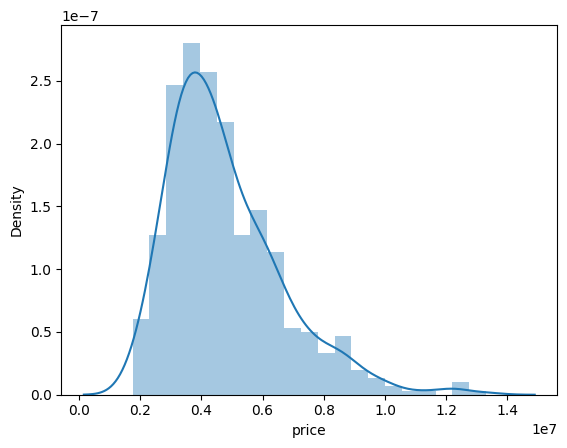

In [ ]:
sns.distplot(df['price'])

A clear positive skewness is seen in the data with indicates the higher price than other usual houses.

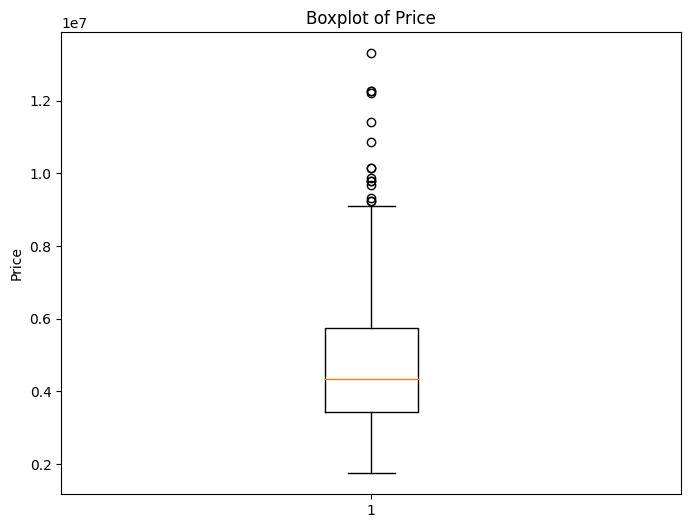

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()
#dataset contains several outliers

In [ ]:
# Calculate quartiles and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]

print("Records of outliers:")
print(outliers)
#the outliers in the dataset are given below

Records of outliers:
       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   
11   96

<Axes: xlabel='furnishingstatus', ylabel='price'>

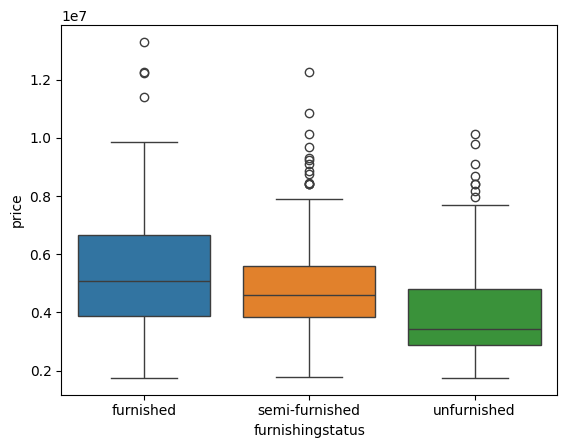

In [ ]:
sns.boxplot(x='furnishingstatus', y='price', data=df, hue='furnishingstatus')
#furnishing status is significantly effecting the target feature so lets modify this column according to the linear regression model in data cleaning section.

# Data Cleaning

Since we found outliers above we filter them out from the dataset inorder to avoid the outliers from decreasing the performance of model.

In [ ]:
# Define the criteria for outliers
criteria_outliers = ((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))


# Find the outliers that also meet the filtering criteria
outliers_to_remove = df[criteria_outliers]

# Remove the outliers from the DataFrame
df.drop(outliers_to_remove.index,inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(530, 13)

**Encoding**

Many features are of binary categorical type so we encode 'yes' with 1 and 'no' with 0.
Coming to the furnished features which have 3 categories i.e., furnished, unfurnished and semi_furnished so we use dummies mechanism.

In [ ]:
# List of binary categorical variables
binary_categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Encode binary categorical variables
for column in binary_categorical_columns:
    df[column] = df[column].map({'no': 0, 'yes': 1})

# Display the DataFrame with encoded binary categorical variables
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000         4          1        2         1          0   
16  9100000  6600         4          2        2         1          1   
17  8960000  8500         3          2        4         1          0   
18  8890000  4600         3          2        2         1          1   
19  8855000  6420         3          2        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0        2         0   
16         1                0                1        1         1   
17         0                0                1        2         0   
18         0                0                1        2         0   
19         0                0                1        1         1   

   furnishingstatus  
15   semi-furnished  
16      unfurnished  
17        furnished  
18        furnished  
19   semi-furnished  


In [ ]:
# Map categories to 0 and 1
df['furnished'] = (df['furnishingstatus'] == 'furnished').astype(int)
df['semi_furnished'] = (df['furnishingstatus'] == 'semi-furnished').astype(int)
df['unfurnished'] = (df['furnishingstatus'] == 'unfurnished').astype(int)

In [ ]:
# Drop the 'furnishingstatus' column
df.drop('furnishingstatus', axis=1, inplace=True)

In [ ]:
#lets check the modified dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi_furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1,0


# data analysis

In [ ]:
df.nunique()

price              208
area               278
bedrooms             6
bathrooms            3
stories              4
mainroad             2
guestroom            2
basement             2
hotwaterheating      2
airconditioning      2
parking              4
prefarea             2
furnished            2
semi_furnished       2
unfurnished          2
dtype: int64

In [ ]:
df.corr()['price']

price              1.000000
area               0.509856
bedrooms           0.332293
bathrooms          0.457962
stories            0.432528
mainroad           0.310712
guestroom          0.290195
basement           0.195705
hotwaterheating    0.082829
airconditioning    0.462342
parking            0.328308
prefarea           0.292536
furnished          0.216759
semi_furnished     0.085865
unfurnished       -0.289439
Name: price, dtype: float64

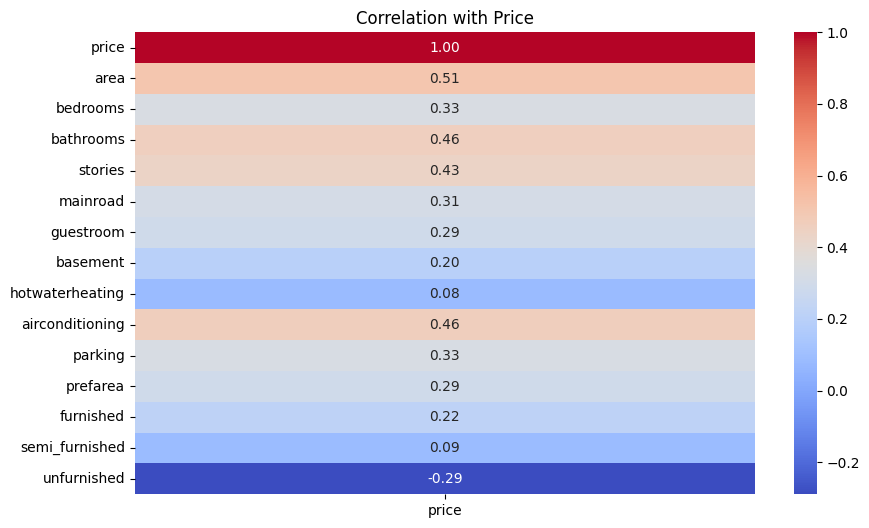

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()['price'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Price')
plt.show()

There is significant correlation between all the columns in the dataset and price.But some of them have less correlation like hotwaterheating and basement.so lets remove them.

# Model building

**Steps in Model Building**:

*   Standardising data
*   PCA
*   model building
*   model testing
*   model evaluation
*   model's final performance







In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['price','hotwaterheating','basement'], axis=1))

# Create a PCA instance
pca = PCA(n_components=4)  # Specify the number of components to keep

# Fit PCA to the scaled data
pca.fit(X_scaled)

# Transform the data onto the new feature space
X_pca = pca.transform(X_scaled)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X contains features and y contains target variable
X=X_pca
Y=df['price']

# Convert X and y to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate MSE
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1218921474907.3435


In [ ]:
from sklearn.metrics import r2_score
# Calculate the R^2 score
r2 = r2_score(y_test,y_pred)

print("R^2 Score:", r2)


R^2 Score: 0.6479771088790912


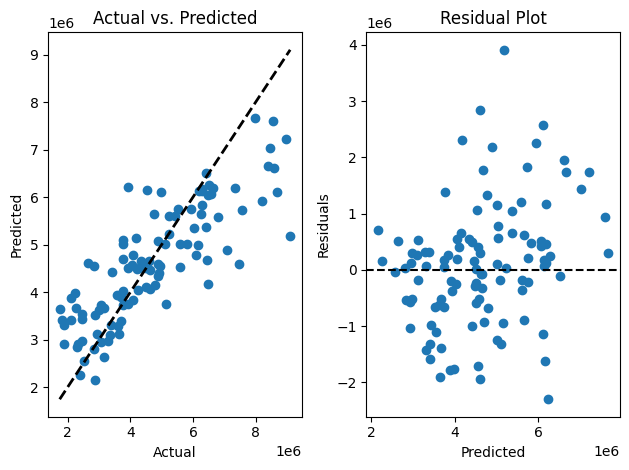

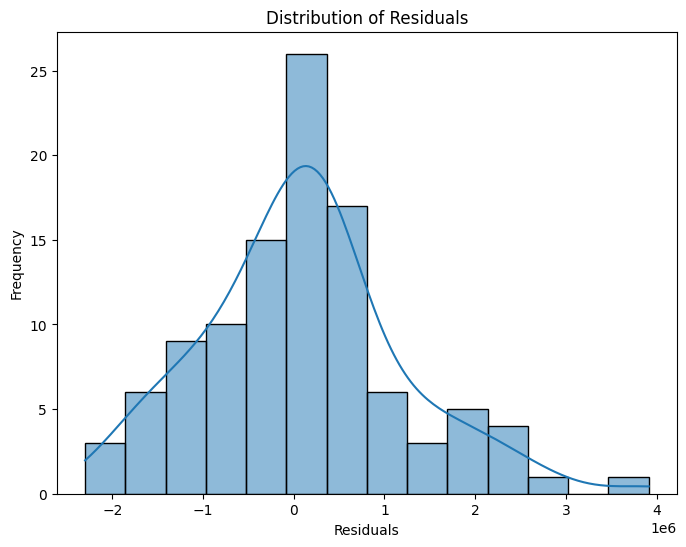

In [ ]:
# Scatter plot of actual vs. predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)  # Plot the diagonal
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()